

# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Well Logging Data (EDA, Visualization)</p>


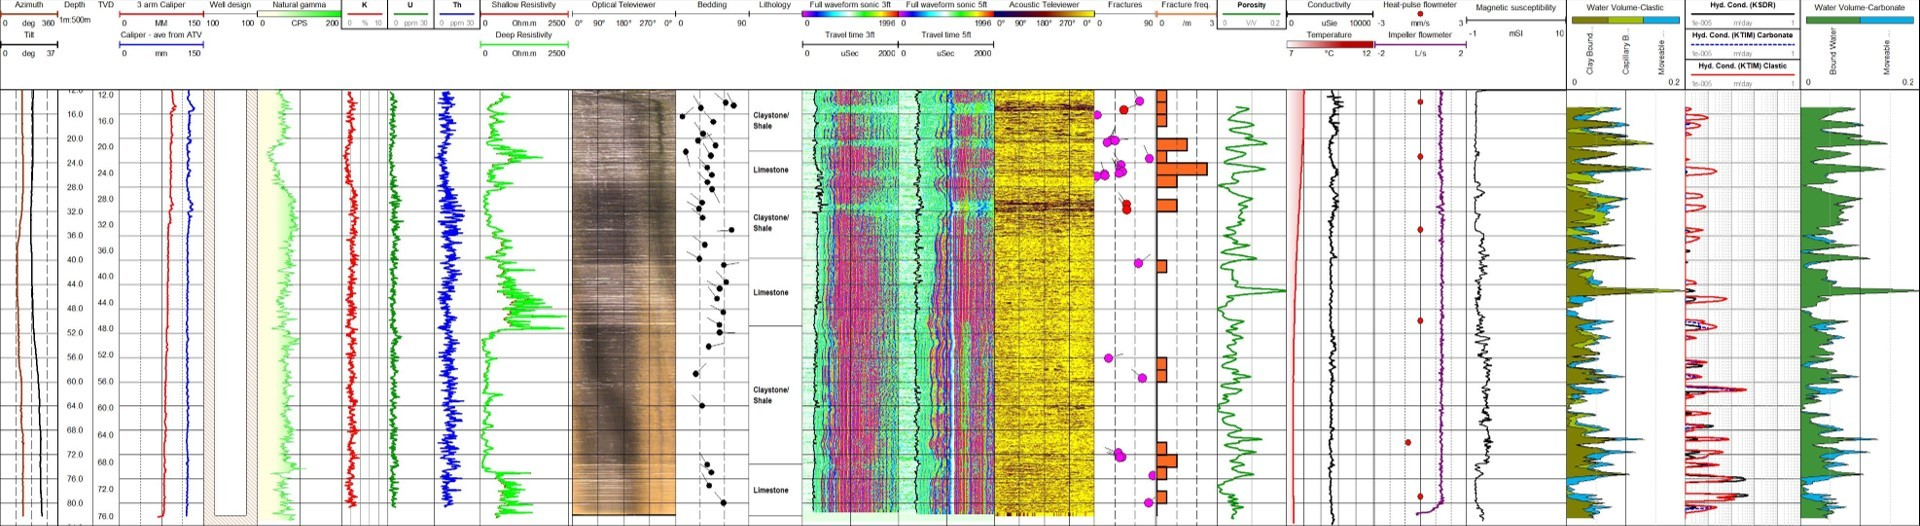

**by Sobhan Mohammadi**
* Previously: Wireline Logging General Field Engineer
* Currently  :  Data Sience&AI Student
* EMail      : sobhanmohammadi.ds@gmail.com



# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing & Installing Libraries</p>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# !pip install lasio
# !pip install mplstereonet



# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Dataset</p>


In [ ]:
# !wget https://raw.githubusercontent.com/sobhanmohammadi/formation-evaluation/main/fracture.py

In [ ]:
import lasio 
import mplstereonet as mpl
import fracture

In [ ]:
#data links
well_path= "http://bit.ly/wireline-data"
trajectory_path= "http://bit.ly/trajectory-data"
fracture_path="http://bit.ly/fractures-data"

* Well log data (format=LAS)




# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA, Preprocessing</p>


In [ ]:
# Read LAS well log data
well=lasio.read(well_path)

In [ ]:
#display mnemonics of well log
well.curves

In [ ]:
# data is in multidimentional array (numpy data)
well.data

In [ ]:
#convert to dataframe to display as table
well_df=well.df().reset_index()

In [ ]:
#visualise missing value with missingno package
msno.matrix(well_df)



# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>


In [ ]:
log=["NPHI","RHOB","GR","RDEP","DTC"]
color=["black","green","orange","blue","red"]

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(log)):
  plt.subplot(1,5,i+1)
  if log[i]=="RDEP":
    #plot in semilog
    plt.semilogx(well[log[i]],well["DEPT"],color=color[i])
  else:
    #plot in normal
    plt.plot(well[log[i]],well["DEPT"],color=color[i])
  # invert depth from lowest to highest (top to bottom)
  plt.ylim(3500,1000)
  plt.title(log[i])
  plt.grid()

plt.tight_layout()
plt.show()



# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Wellbore Trajectory</p>


In [ ]:
trajectory_df=pd.read_csv(trajectory_path)
trajectory_df.head(10)

In [ ]:
import plotly.express as px

In [ ]:
#x=trajectory_df["surfEw"]; y=trajectory_df["surfNs"]; z=trajectory_df["tvd"]

fig=px.scatter_3d(trajectory_df, x="surfEw",y="surfNs",z="tvd",color="incl")
fig.update_scenes(zaxis_autorange="reversed")
fig.show()


# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Natural Fracture Analysis</p>


In [ ]:
frac_df=pd.read_csv(fracture_path)

frac_df

In [ ]:
strike=frac_df["strike"]
dip=frac_df["dip"]

* **Visualise stereonet using function defined in fracture.py**

In [ ]:
fracture.stereonet(strike,dip)

* **Strike is from 0 to 40 degree, dip is around 80 and 90 degree**

* **Visualise rose diagram from fracture library**

In [ ]:
fracture.rose(strike)